In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn')
# mpl.rc_params['font.family']='serif'
%matplotlib inline


/var/folders/hw/6y3jl5yx0wn2w9kg6bwzl0lh0000gp/T/ipykernel_66188/4202728635.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


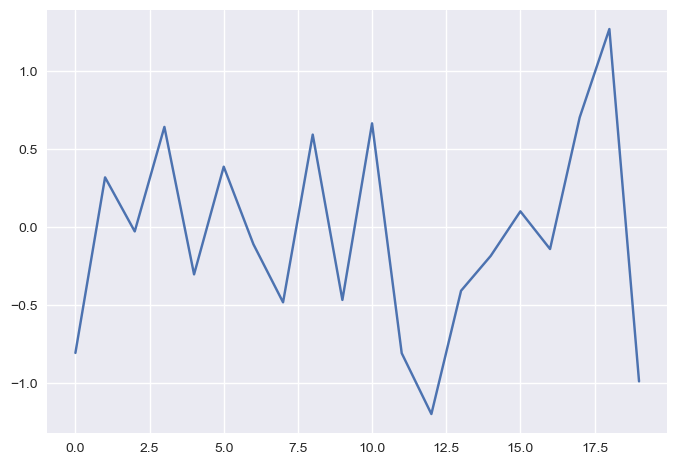

In [22]:
import numpy as np
np.random.seed(1000)
y=np.random.standard_normal(20)
x=np.arange(len(y))
plt.plot(x,y)

(-3.191531061721108, 1.434220978837648)

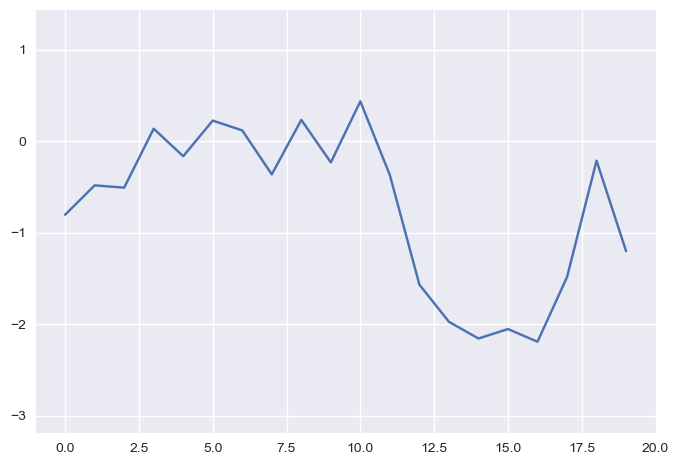

In [23]:
plt.plot(y.cumsum())
plt.xlim(-1,20)
plt.ylim(np.min(y.cumsum())-1,np.max(y.cumsum())+1)


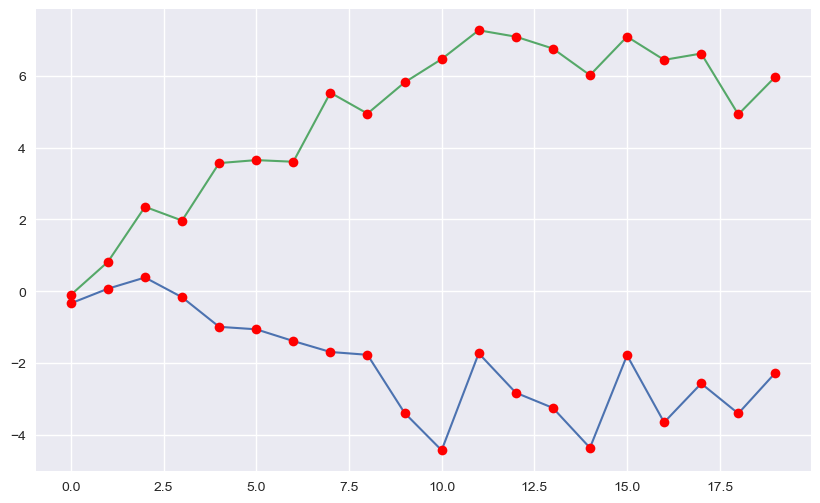

In [24]:
y=np.random.standard_normal((20,2)).cumsum(axis=0)
plt.figure(figsize=(10,6))
plt.plot(y,lw=1.5)
plt.plot(y,'ro')


In [25]:
strike=np.linspace(50,150,24)
ttm=np.linspace(0.5,2.5,24)
strike,ttm=np.meshgrid(strike,ttm)


In [26]:
iv=(strike - 100) ** 2 / (100 * strike) / ttm
iv[:5,:3]

array([[1.        , 0.76695652, 0.58132045],
       [0.85185185, 0.65333333, 0.4951989 ],
       [0.74193548, 0.56903226, 0.43130227],
       [0.65714286, 0.504     , 0.38201058],
       [0.58974359, 0.45230769, 0.34283001]])

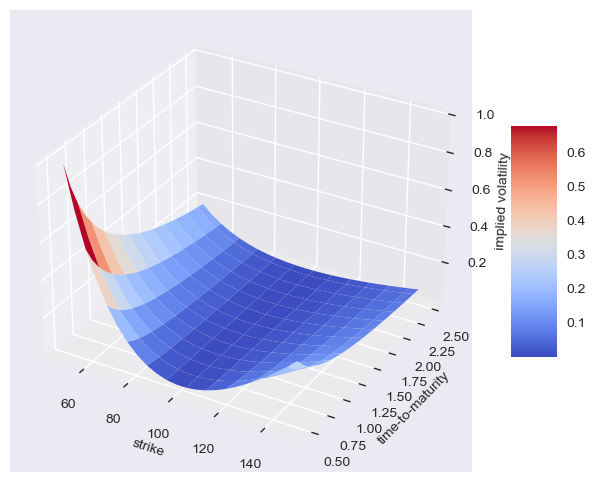

In [27]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(strike, ttm, iv, rstride=2, cstride=2,
                       cmap=plt.cm.coolwarm, linewidth=0.5,
                       antialiased=True)
ax.set_xlabel('strike')
ax.set_ylabel('time-to-maturity')
ax.set_zlabel('implied volatility')
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


In [10]:
import pandas as pd
import cufflinks as cf
import plotly.offline as plyo
plyo.init_notebook_mode(connected=True)

In [30]:
a=np.random.standard_normal((250,5)).cumsum(axis=0)
index=pd.date_range('2019-1-1',freq='B',periods=len(a))
df=pd.DataFrame(100+5*a,columns=list('abcde'),index=index)


In [31]:
df.head()

,a,b,c,d,e
2019-01-01,89.358373,92.814303,100.889686,106.972114,101.456601
2019-01-02,88.948342,96.035516,102.530085,111.259277,96.771755
2019-01-03,89.848717,88.918663,100.691306,103.642838,93.597896
2019-01-04,94.785736,83.838565,110.919925,104.892830,96.853709
2019-01-07,88.455618,90.709343,107.870399,105.046620,100.951992


In [32]:
plyo.iplot(df.iplot(asFigure=True),image='png',filename='ply_01')

In [36]:
plyo.iplot(

    df[['a','b']].iplot(asFigure=True,
                        theme='polar',
                        title='A Time series plot',
                        xTitle='date',
                        yTitle='Value',
                        mode={'a':'markers','b':'lines+markers'},
                        symbol={'a':'circle','b':'diamond'},
                        size=3.5,
                        color={'a':'blue','b':'magenta'},
                        
                        ),
                        image='png'
)

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
from statsmodels.tsa.stattools import coint
# tickers = ["INFY.NS", "TCS.NS", "HDFCBANK.NS", "ICICIBANK.NS"]
# data = yf.download(tickers, period="5y", interval="1d", group_by="ticker")
# data.to_csv("5_years.csv")
# Clean and preprocess data
# data = data["Close"].dropna()
# data = data.apply(lambda x: np.log(x))


In [75]:

# df.plot(figsize=(10,12),subplots=True)

In [3]:
# adj_close_df=df.loc[:,df.columns.str.contains('.NS.4')].rename('Adj Close')

# Assuming the given DataFrame is named 'df'
# Selecting the column with 'Adj Close' for each stock by using '.NS.4' pattern
df=pd.read_csv('5_years.csv')
df.rename(columns={'Unnamed: 0':'Date'},inplace=True)
adj_close_df = df.loc[:, df.columns.str.contains('.NS.4')].rename(columns=lambda x: x.replace('.NS.4', '')).rename(columns={'Adj Close': 'Adj Close'})
adj_close_df['Date']=df['Date']
adj_close_df= adj_close_df.set_index('Date')
adj_close_df=adj_close_df.drop(adj_close_df.index[:2])
adj_close_df=adj_close_df.astype('float')


# Printing the resulting DataFrame
print(adj_close_df.head())


             ICICIBANK          TCS        INFY     HDFCBANK
Date                                                        
2018-07-16  251.750015  1786.630493  576.354919  1046.393433
2018-07-17  258.741730  1801.885010  574.214417  1050.204834
2018-07-18  255.100204  1800.175171  571.900940  1049.939575
2018-07-19  253.643600  1783.210449  569.371277  1054.716064
2018-07-20  258.110504  1796.890381  582.949341  1056.139160


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

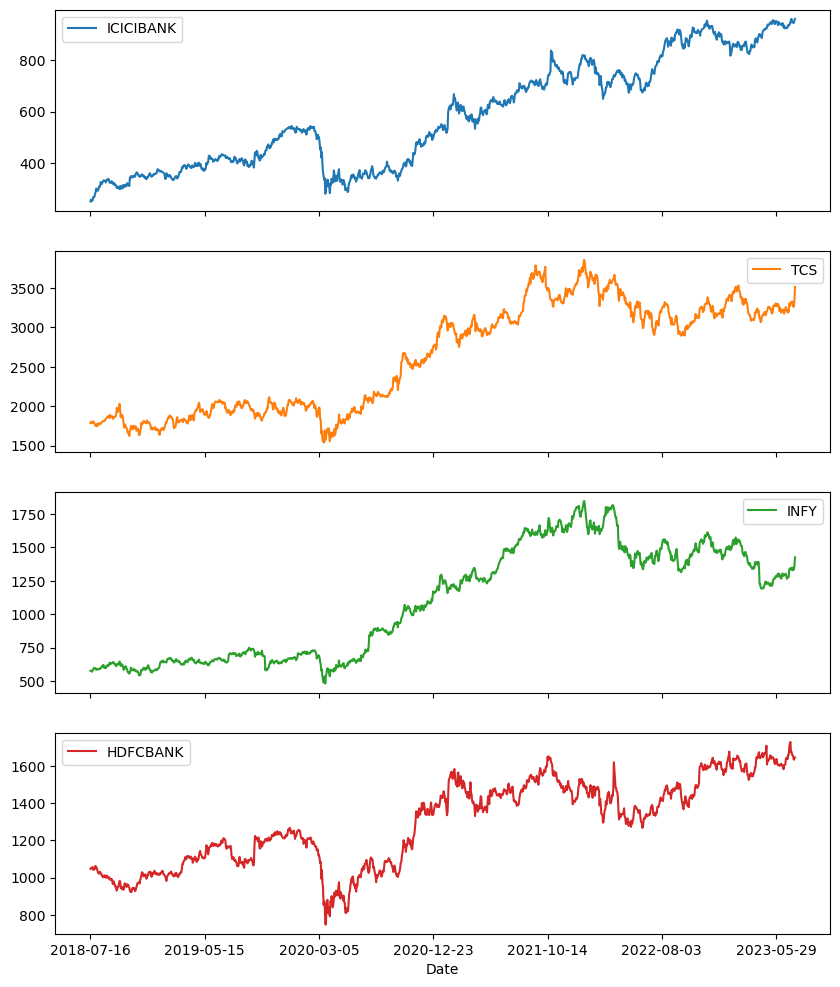

In [4]:
adj_close_df.plot(figsize=(10,12),subplots=True)

In [86]:
adj_close_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1234 entries, 2018-07-16 to 2023-07-14
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ICICIBANK  1234 non-null   float64
 1   TCS        1234 non-null   float64
 2   INFY       1234 non-null   float64
 3   HDFCBANK   1234 non-null   float64
dtypes: float64(4)
memory usage: 48.2+ KB


In [90]:
adj_close_df.describe().round()

,ICICIBANK,TCS,INFY,HDFCBANK
count,1234.0,1234.0,1234.0,1234.0
mean,584.0,2628.0,1092.0,1294.0
std,209.0,677.0,409.0,231.0
min,252.0,1539.0,480.0,747.0
25%,384.0,1938.0,654.0,1084.0
50%,542.0,2882.0,1191.0,1336.0
75%,751.0,3225.0,1468.0,1484.0
max,960.0,3857.0,1848.0,1728.0


In [91]:
adj_close_df.mean()

ICICIBANK     584.346806
TCS          2627.783944
INFY         1092.115719
HDFCBANK     1293.920184
dtype: float64

In [93]:
adj_close_df.aggregate([
    min,np.mean,np.std,np.median]).round(2)

,ICICIBANK,TCS,INFY,HDFCBANK
min,251.75,1538.81,480.23,747.04
mean,584.35,2627.78,1092.12,1293.92
std,208.56,677.42,409.04,230.55
median,541.53,2882.19,1191.03,1335.96


In [95]:
adj_close_df.diff().mean()

ICICIBANK    0.574453
TCS          1.401476
INFY         0.689047
HDFCBANK     0.485082
dtype: float64

In [96]:
adj_close_df.pct_change().round(3).head()

,ICICIBANK,TCS,INFY,HDFCBANK
Date,,,,
2018-07-16,NaN,NaN,NaN,NaN
2018-07-17,0.028,0.009,-0.004,0.004
2018-07-18,-0.014,-0.001,-0.004,-0.000
2018-07-19,-0.006,-0.009,-0.004,0.005
2018-07-20,0.018,0.008,0.024,0.001


<Axes: >

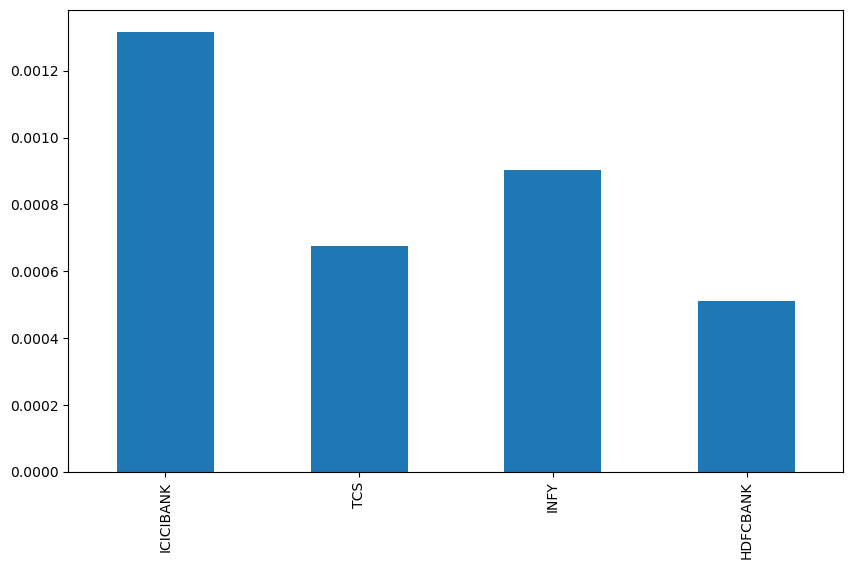

In [97]:
adj_close_df.pct_change().mean().plot(kind='bar',figsize=(10,6))

In [98]:
rets=np.log(adj_close_df/adj_close_df.shift(1))

In [99]:
rets.head().round(3)

,ICICIBANK,TCS,INFY,HDFCBANK
Date,,,,
2018-07-16,NaN,NaN,NaN,NaN
2018-07-17,0.027,0.009,-0.004,0.004
2018-07-18,-0.014,-0.001,-0.004,-0.000
2018-07-19,-0.006,-0.009,-0.004,0.005
2018-07-20,0.017,0.008,0.024,0.001


<Axes: xlabel='Date'>

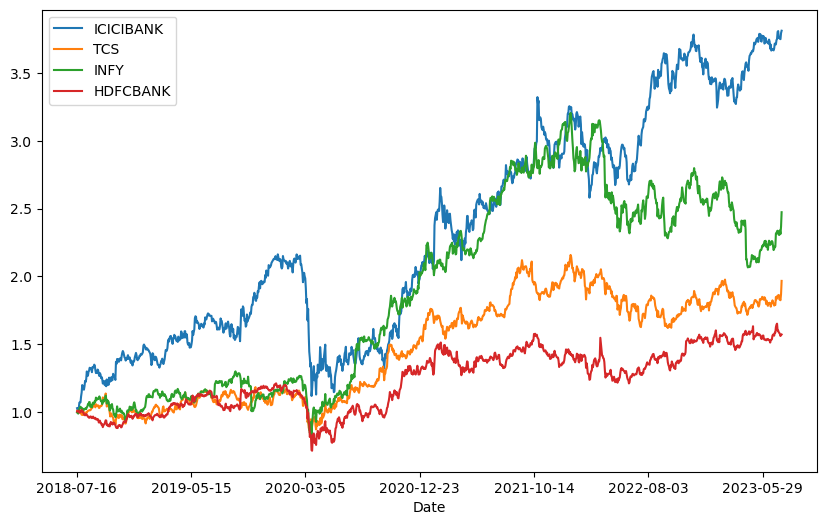

In [100]:
rets.cumsum().apply(np.exp).plot(figsize=(10,6))
#Plots  the  cumulative  log  returns  over  time;  first  the  cumsum()  method  is  called,
#then np.exp() is applied to the results

In [111]:
adj_close_df.index=pd.to_datetime(adj_close_df.index)
adj_close_df.resample('1w',label='right').last().head()

,ICICIBANK,TCS,INFY,HDFCBANK
Date,,,,
2018-07-22,258.110504,1796.890381,582.949341,1056.139160
2018-07-29,287.900970,1749.327026,593.911377,1062.459473
2018-08-05,299.487701,1781.455811,589.868042,1023.621033
2018-08-12,322.661194,1793.740356,599.100281,1020.147400
2018-08-19,333.855133,1811.425049,618.516235,1002.247864


In [112]:
adj_close_df.resample('1m',label='right').last().head()

,ICICIBANK,TCS,INFY,HDFCBANK
Date,,,,
2018-07-31,298.751282,1746.131592,590.300598,1051.531738
2018-08-31,337.911316,1870.508301,623.164673,994.456116
2018-09-30,301.368347,1965.275513,631.380676,967.848267
2018-10-31,350.141602,1747.960938,600.094666,922.351746
2018-11-30,350.289551,1775.107300,583.527466,1026.901855


<Axes: xlabel='Date'>

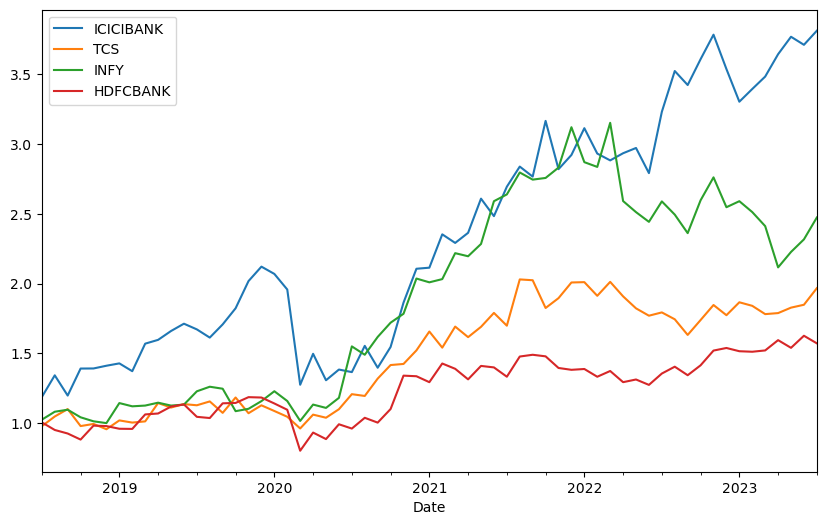

In [120]:
rets.index=pd.to_datetime(rets.index)
rets.cumsum().apply(np.exp) .resample('1m',label='right').last().plot(figsize=(10,6))

In [157]:
sym='ICICIBANK'
icici_df=pd.DataFrame(adj_close_df[sym]).dropna()
icici_df.head()

,ICICIBANK
Date,
2018-07-16,251.750015
2018-07-17,258.741730
2018-07-18,255.100204
2018-07-19,253.643600
2018-07-20,258.110504


In [158]:
# icici_df.dropna(inplace=True)
# print(icici_df.head())
window=20
# print(icici_df.rolling(window=window).min())
icici_df['min'] = icici_df[sym].rolling(window=window).min()  
icici_df['mean']= icici_df[sym].rolling(window=window).mean()
icici_df['std']=icici_df[sym].rolling(window=window).std()
icici_df['median']=icici_df[sym].rolling(window=window).median()
icici_df['max']=icici_df[sym].rolling(window=window).max()
icici_df['ewma']=icici_df[sym].ewm(halflife=0.5,min_periods=window).mean()


In [162]:
icici_df.dropna(inplace=True)

icici_df.head()

,ICICIBANK,min,mean,std,median,max,ewma
Date,,,,,,,
2018-08-10,322.661194,251.750015,286.023348,24.087238,290.527618,326.981628,322.774920
2018-08-13,319.028015,253.643600,289.387248,23.744291,293.522476,326.981628,319.964741
2018-08-14,326.441589,253.643600,292.772241,23.970101,296.320984,326.981628,324.822377
2018-08-16,328.258148,253.643600,296.430138,23.496037,299.119492,328.258148,327.399205
2018-08-17,333.855133,258.110504,300.440715,22.638416,300.641464,333.855133,332.241151


<Axes: xlabel='Date'>

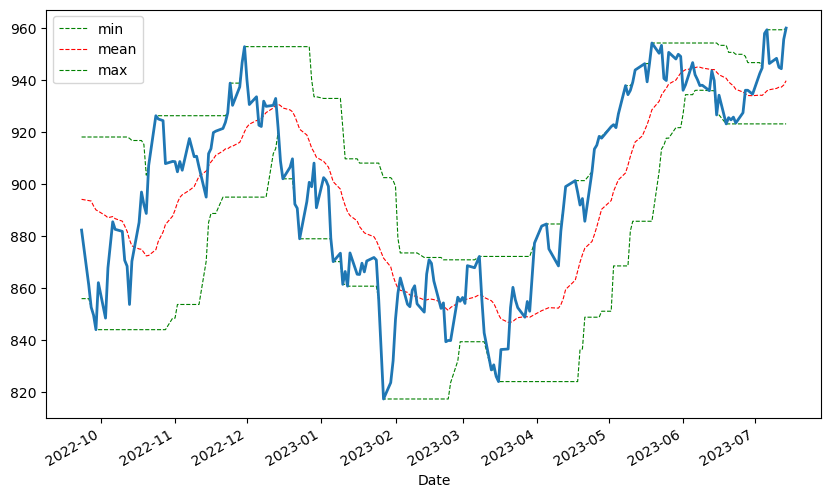

In [167]:
ax=icici_df[['min','mean','max']].iloc[-200:].plot(
    
    figsize=(10,6),
    style=['g--','r--','g--'],
    lw=0.8,
    )
icici_df[sym].iloc[-200:].plot(ax=ax,lw=2.0)

In [219]:
icici_df['sma1']=icici_df[sym].rolling(window=42).mean()
icici_df['sma2']=icici_df[sym].rolling(window=252).mean()

<Axes: xlabel='Date'>

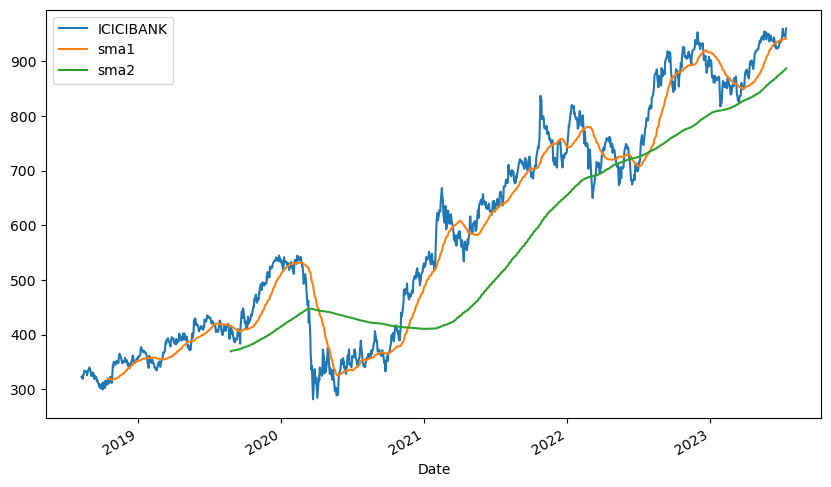

In [220]:
icici_df[[sym,'sma1','sma2']].plot(figsize=(10,6))

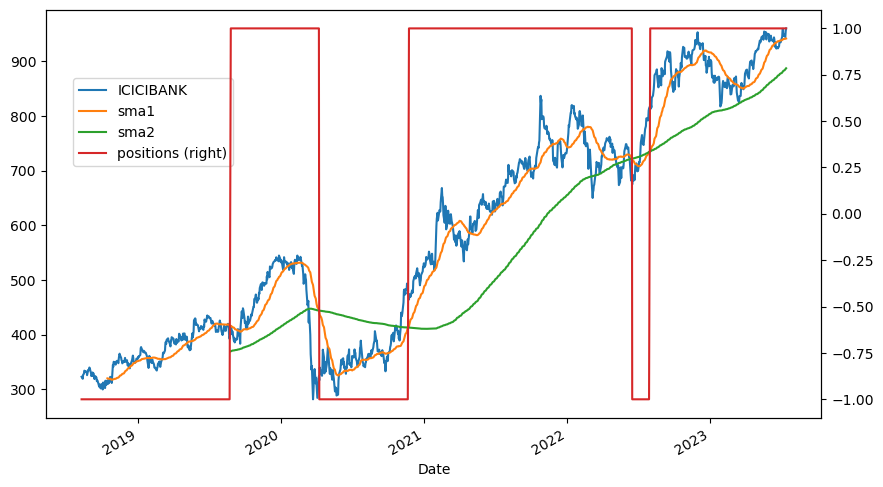

In [221]:
icici_df.dropna()
icici_df['positions']=np.where(icici_df['sma1']>icici_df['sma2'],1,-1)
ax=icici_df[[sym,'sma1','sma2','positions']].plot(figsize=(10,6),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25,0.85))

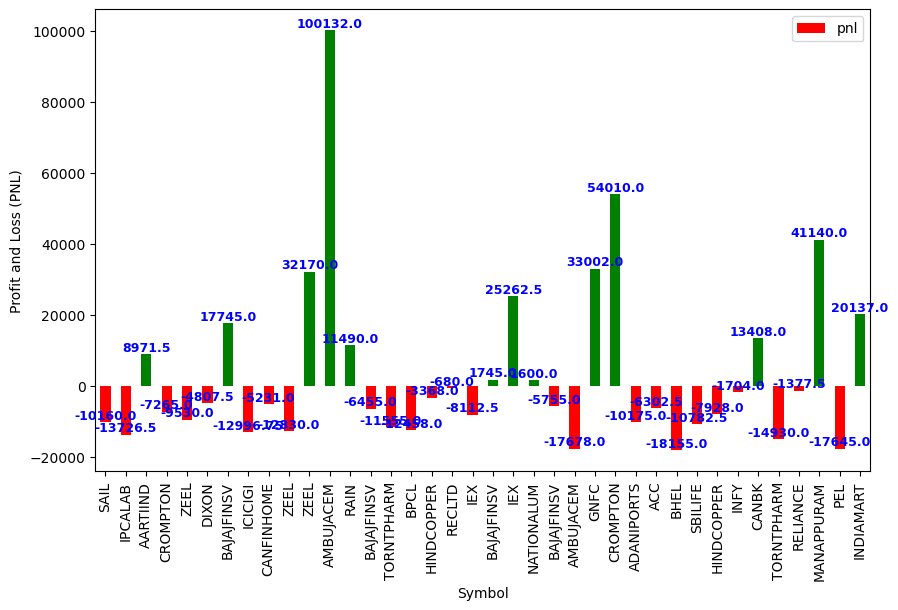

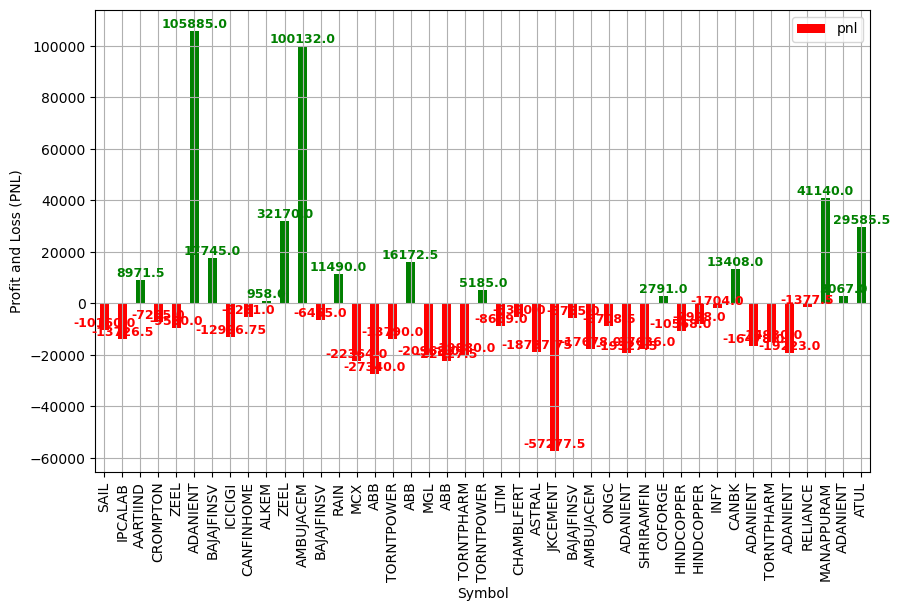

In [12]:
colors = ['red' if pnl < 0 else 'green' for pnl in df['pnl']]
ax=df.plot(x='symbol',y='pnl',kind='bar',figsize=(10,6),color=colors)
plt.xlabel('Symbol')
plt.ylabel('Profit and Loss (PNL)')
plt.grid(True);
for index, value in enumerate(df['pnl']):
    color = 'red' if value < 0 else 'green'
    ax.text(index, value, str(value), ha='center', va='bottom', color=color, fontsize=9, weight='bold')

plt.show()



In [85]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [27]:
nifty50=pd.read_csv('NIFTY50.csv')
india_vix=pd.read_csv('india_vix.csv').drop(columns=['Unnamed: 0'])

In [47]:
nifty50['Date']=pd.to_datetime(nifty50['Date'])
india_vix['Date']=pd.to_datetime(india_vix['Date'])
date_threshold = pd.to_datetime('2013-01-01')
filtered_nifty50=nifty50[nifty50['Date']>=date_threshold]
filtered_vix=india_vix[india_vix['Date']>=date_threshold]

In [70]:
nifty50_vix=pd.merge(filtered_nifty50[['Date','Close']].rename({'Close':'NIFTY50'}),filtered_vix[['Date','Close']].rename({'Close':"VIX"}),on='Date', how='inner')
nifty50_vix=nifty50_vix.rename(columns={'Close_x':'NIFTY50','Close_y':'VIX'})
nifty50_vix.dropna(inplace=True)


In [72]:
nifty50_vix.set_index('Date',inplace=True)

In [73]:
nifty50_vix.head()

,NIFTY50,VIX
Date,,
2023-03-14,17043.3,16.2175
2023-03-13,17154.3,16.2150
2023-03-10,17412.9,13.4125
2023-03-09,17589.6,12.7250
2023-03-08,17754.4,12.4500


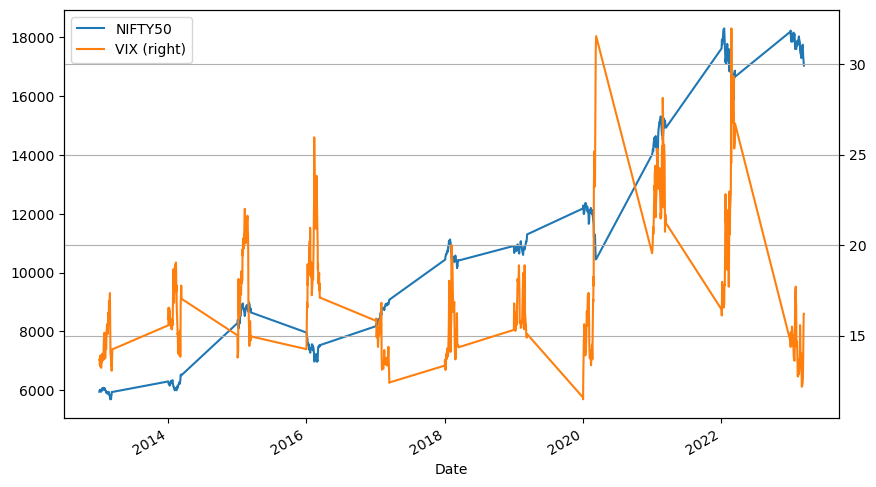

In [84]:
nifty50_vix.plot(secondary_y='VIX',grid=True,figsize=(10,6));

In [86]:
rets=np.log(nifty50_vix/nifty50_vix.shift(1))

In [97]:
rets.dropna(inplace=True)

Text(0.5, 1.0, 'log returns of NIFTY50 and vix over time')

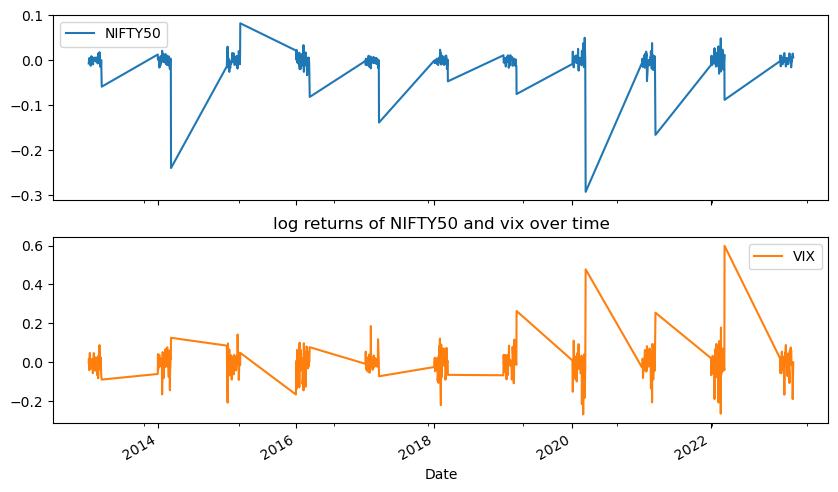

In [98]:
rets.plot(subplots=True,figsize=(10,6))
plt.title('log returns of NIFTY50 and vix over time')

array([[<Axes: xlabel='NIFTY50', ylabel='NIFTY50'>,
        <Axes: xlabel='VIX', ylabel='NIFTY50'>],
       [<Axes: xlabel='NIFTY50', ylabel='VIX'>,
        <Axes: xlabel='VIX', ylabel='VIX'>]], dtype=object)

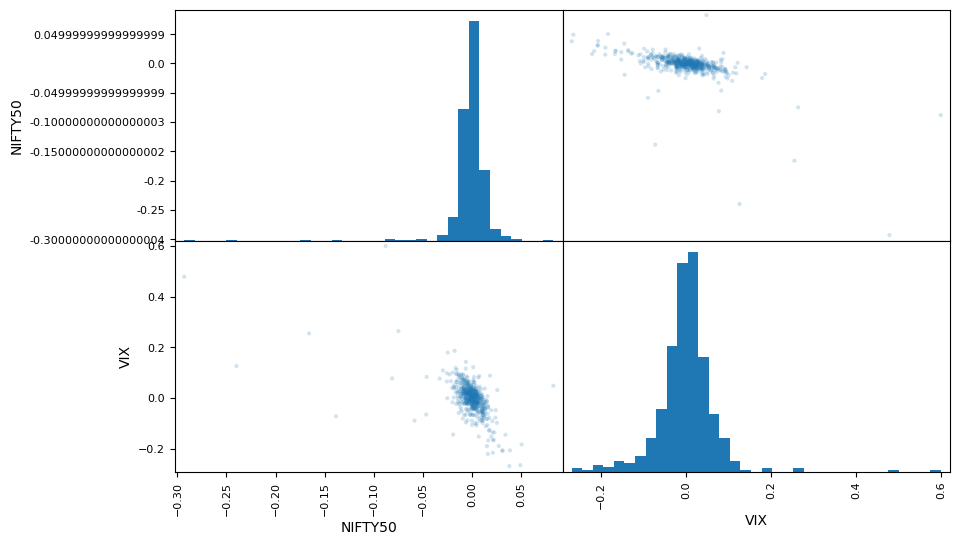

In [99]:
pd.plotting.scatter_matrix(
    rets,
    alpha=0.2,
    diagonal='hist',
    hist_kwds={'bins':35},
    figsize=(10,6)
)

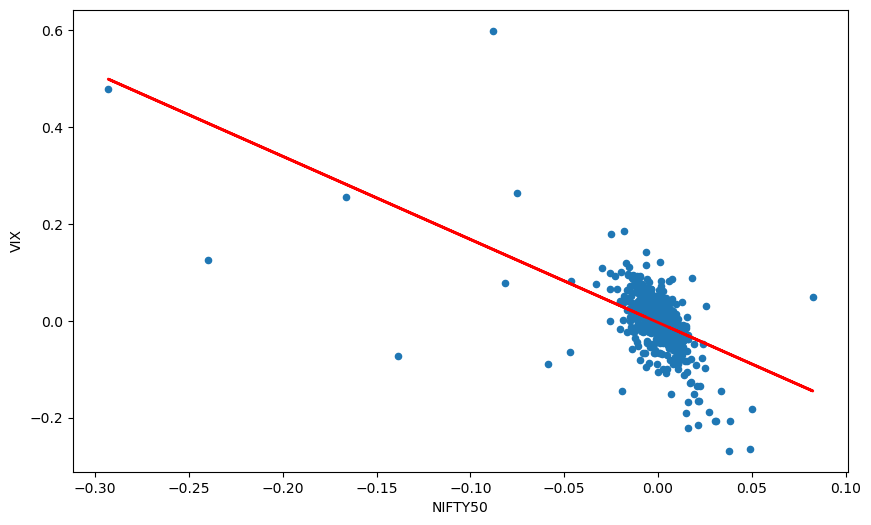

In [100]:

reg=np.polyfit(rets['NIFTY50'],rets['VIX'],deg=1)
ax=rets.plot(kind='scatter',x='NIFTY50',y='VIX',figsize=(10,6))
ax.plot(rets['NIFTY50'],np.polyval(reg,rets['NIFTY50']),'r',lw=2);

In [101]:
rets.corr()

,NIFTY50,VIX
NIFTY50,1.000000,-0.570802
VIX,-0.570802,1.000000


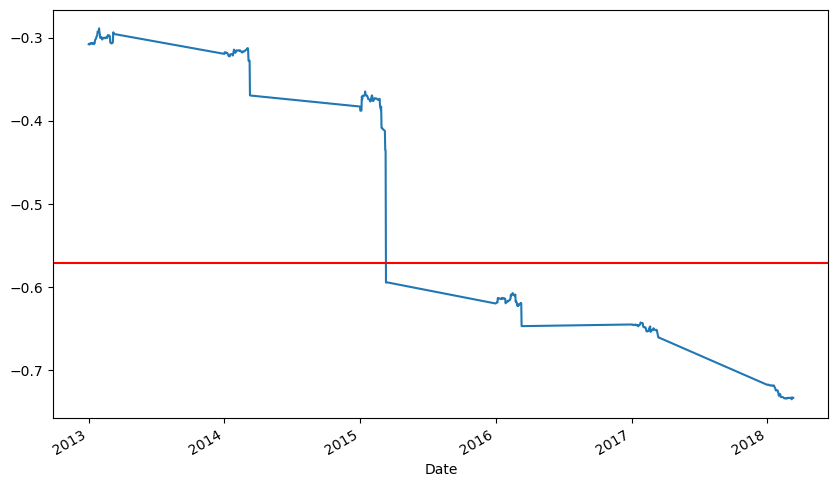

In [103]:
ax=rets['NIFTY50'].rolling(window=252).corr(rets['VIX']).plot(figsize=(10,6))
ax.axhline(rets.corr().iloc[0,1],c='r');

In [117]:
import pickle
import numpy as np
from random import gauss
a=[gauss(1.5,2) for i in range(1000000)]
path='/Users/sandippawar/Documents/projects/crispy-spoon/notebooks/'
pkl_file=open(path+'data.pkl','wb')



In [118]:
%time pickle.dump(a,pkl_file)

CPU times: user 14.2 ms, sys: 4.45 ms, total: 18.6 ms
Wall time: 17.3 ms


In [121]:
pkl_file.close()

In [120]:
ll $path

total 23176
-rw-r--r--@ 1 sandippawar  staff   215048 Jul 17 06:10 HistoricalPE_PBDIV_Data.csv
-rw-r--r--@ 1 sandippawar  staff   317742 Jul 29 15:05 NIFTY50.csv
-rw-r--r--@ 1 sandippawar  staff        0 Jul 29 11:57 __init__.py
-rw-r--r--@ 1 sandippawar  staff   223442 Jun 27 13:42 algo_trading.ipynb
-rw-r--r--@ 1 sandippawar  staff    13947 Jun 27 13:42 arbitrage.ipynb
-rw-r--r--@ 1 sandippawar  staff  9003247 Jul 30 12:28 data.pkl
-rw-r--r--@ 1 sandippawar  staff  1491050 Jul 30 12:28 finance.ipynb
-rw-r--r--@ 1 sandippawar  staff    67582 Jul 29 12:14 india_vix.csv
-rw-r--r--@ 1 sandippawar  staff    78006 Jun 27 13:42 options_wizard.ipynb


In [122]:
pkl_file=open(path+'data.pkl','rb')


In [123]:
%time b=pickle.load(pkl_file)

CPU times: user 10.9 ms, sys: 5.65 ms, total: 16.5 ms
Wall time: 16.4 ms


In [124]:
a[:3]

[-1.0469603963541783, -0.7009687188959934, 1.6357174601527367]

In [125]:
b[:3]

[-1.0469603963541783, -0.7009687188959934, 1.6357174601527367]

In [126]:
np.allclose(np.array(a),np.array(b))

True

In [129]:
pkl_file=(path+'data.pkl','wb')



In [133]:
pkl_file = open(path + 'data.pkl', 'wb')

In [140]:
%time pickle.dump(np.array(a) ** 2, pkl_file) 
pkl_file.close()

CPU times: user 30.1 ms, sys: 5.4 ms, total: 35.5 ms
Wall time: 35.7 ms


In [141]:
pkl_file=open(path+'data.pkl','rb')
x=pickle.load(pkl_file)
x[:4]

array([-1.0469604 , -0.70096872,  1.63571746,  1.90430387])

In [142]:
y = pickle.load(pkl_file)
y[:4]

array([-1.0469604 , -0.70096872,  1.63571746,  1.90430387])

In [143]:
pkl_file.close()

In [149]:
import pandas as pd
rows=5000
a=np.random.standard_normal((rows,5)).round(4)


In [150]:
a

array([[ 2.0311,  0.3105,  0.5727,  0.7355,  2.0595],
       [-1.551 , -0.6183, -0.1224,  2.4151,  0.3414],
       [ 1.5891, -0.6568,  0.2073, -0.0576, -1.6165],
       ...,
       [ 1.4389,  0.3255,  0.1722,  0.1098, -0.3076],
       [-0.2282,  0.2923, -1.1517, -1.3301,  2.4908],
       [ 1.3236, -1.8608, -0.7599,  0.4828, -0.173 ]])

In [153]:
t=pd.date_range(start='2019/1/1',periods=rows,freq='H')


In [154]:
t

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 01:00:00',
               '2019-01-01 02:00:00', '2019-01-01 03:00:00',
               '2019-01-01 04:00:00', '2019-01-01 05:00:00',
               '2019-01-01 06:00:00', '2019-01-01 07:00:00',
               '2019-01-01 08:00:00', '2019-01-01 09:00:00',
               ...
               '2019-07-27 22:00:00', '2019-07-27 23:00:00',
               '2019-07-28 00:00:00', '2019-07-28 01:00:00',
               '2019-07-28 02:00:00', '2019-07-28 03:00:00',
               '2019-07-28 04:00:00', '2019-07-28 05:00:00',
               '2019-07-28 06:00:00', '2019-07-28 07:00:00'],
              dtype='datetime64[ns]', length=5000, freq='H')

In [158]:
csv_file=open(path+'data.csv','w')
header='date,no1,no2,no3,no4,no5\n'
csv_file.write(header)

25

In [159]:
for t_,(no1,no2,no3,no4,no5) in zip(t,a):
    s=f'{t_},{no1},{no2},{no3},{no4},{no5}\n'
    csv_file.write(s)
csv_file.close() 

In [161]:
csv_file=open(path+'data.csv','r')


In [163]:
for i in range(5):
    print(csv_file.readline(),end='')
csv_file.close()

2019-01-01 04:00:00,-0.5137,-0.5702,1.1365,-0.2272,-1.1974
2019-01-01 05:00:00,-0.1526,-1.9518,0.7909,1.1413,0.3688
2019-01-01 06:00:00,0.4568,0.469,1.504,-1.8513,0.5245
2019-01-01 07:00:00,0.1703,0.8912,0.8506,1.7225,-1.2708
2019-01-01 08:00:00,-0.4382,-0.4361,-1.923,0.0222,2.1898


In [164]:
csv_file = open(path + 'data.csv', 'r')
content=csv_file.readlines()

In [166]:
content[:5]
csv_file.close()

In [167]:
import sqlite3 as sq3
con=sq3.connect(path+'numbs.db')

In [168]:
query='CREATE TABLE numbs (Date date,No1 real,No2 real)'

In [169]:
con.execute(query)

In [170]:
con.commit()

In [172]:
q=con.execute

In [173]:
q('SELECT * FROM sqlite_master').fetchall()

[('table',
  'numbs',
  'numbs',
  2,
  'CREATE TABLE numbs (Date date,No1 real,No2 real)')]

In [174]:
import datetime


In [175]:
now =datetime.datetime.now()

In [177]:
q('INSERT INTO numbs VALUES(?,?,?)',(now,0.12,7.3))

In [178]:
np.random.seed(1000)


In [179]:
data=np.random.standard_normal((10000,2)).round(4)


In [183]:
%%time
for row in data:
    now=datetime.datetime.now(

    )
    q('INSERT INTO numbs VALUES(?,?,?)',(now,row[0],row[1]))
    con.commit()


CPU times: user 113 ms, sys: 2.01 s, total: 2.12 s
Wall time: 2.56 s


In [186]:
q('SELECT * from numbs where no1>0.5').fetchmany(4)

[('2023-07-30 13:19:55.794695', 0.595, -0.4647),
 ('2023-07-30 13:19:55.794707', 0.6673, -0.8061),
 ('2023-07-30 13:19:55.794755', 1.2718, -0.9867),
 ('2023-07-30 13:19:55.794861', 2.6996, 0.802)]

In [187]:
q('DROP TABLE IF EXISTS numbs')

In [188]:
q('SELECT * from sqlite_master').fetchall()

[]

In [189]:
con.close()

In [190]:
dtimes = np.arange('2019-01-01 10:00:00', '2025-12-31 22:00:00',
                           dtype='datetime64[m]')

In [191]:
len(dtimes)

3681360

In [192]:
dty=np.dtype([('Date','<datetime64[m]'),('No1','f'),('No2','f')])

In [193]:
data=np.zeros(len(dtimes),dtype=dty)

In [194]:
data['Date']=dtimes


In [195]:
a=np.random.standard_normal((len(dtimes),2)).round(4)


In [196]:
data['No1']=a[:,0]
data['No2']=a[:,1]

In [197]:
data.nbytes

58901760

In [198]:
%time np.save(path+'array',data)

CPU times: user 816 µs, sys: 9.27 ms, total: 10.1 ms
Wall time: 12.9 ms


In [199]:
%time np.load(path+'array.npy')

CPU times: user 1.13 ms, sys: 9.87 ms, total: 11 ms
Wall time: 9.92 ms


array([('2019-01-01T10:00', -0.3525, -0.0715),
       ('2019-01-01T10:01', -1.8274,  1.5867),
       ('2019-01-01T10:02', -0.6191, -1.3564), ...,
       ('2025-12-31T21:57', -1.5373, -0.3532),
       ('2025-12-31T21:58', -0.0383,  0.9226),
       ('2025-12-31T21:59', -0.6663, -0.7975)],
      dtype=[('Date', '<M8[m]'), ('No1', '<f4'), ('No2', '<f4')])

In [200]:
%time data=np.random.standard_normal((10000,6000)).round(4)

CPU times: user 879 ms, sys: 163 ms, total: 1.04 s
Wall time: 1.22 s


In [201]:

data.nbytes

480000000

In [202]:
%time np.save(path+'array',data)

CPU times: user 795 µs, sys: 71 ms, total: 71.8 ms
Wall time: 107 ms


In [203]:
%time np.load(path+'array.npy')

CPU times: user 1.16 ms, sys: 107 ms, total: 109 ms
Wall time: 251 ms


array([[-0.363 ,  1.9998, -2.7752, ..., -0.1088, -0.2403,  0.7239],
       [-0.9326,  0.6882, -0.093 , ..., -0.1456, -0.1402, -1.7067],
       [ 0.1654, -1.7042, -0.0968, ...,  0.7453,  0.16  ,  1.0821],
       ...,
       [ 0.9242, -1.6016, -0.5011, ...,  0.1531, -0.5105, -0.1052],
       [ 0.7012,  2.3865,  0.4742, ..., -1.2125,  0.0244, -0.9752],
       [-1.1533, -1.3902, -0.902 , ..., -0.2322,  0.2079,  1.0422]])

In [204]:
import random
def average_py(n):
    s=0
    for i in range(n):
        s+=random.random()
    return s/n

In [214]:
n=10000000
%time average_py(n)

CPU times: user 434 ms, sys: 2.4 ms, total: 436 ms
Wall time: 435 ms


0.49998445303612865

In [211]:
%timeit average_py(n)


420 ms ± 4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [217]:
def average_np(n):
    s=np.random.random(n)
    return s.mean()
%time average_np(n)

CPU times: user 46.4 ms, sys: 5.98 ms, total: 52.4 ms
Wall time: 53.2 ms


0.4999252481458162

In [218]:
%timeit average_np(n)

35.8 ms ± 234 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [219]:
def fib_rec_py1(n):
             if n < 2:
                 return n
             else:
                 return fib_rec_py1(n - 1) + fib_rec_py1(n - 2)

In [224]:
%time fib_rec_py1(35)

CPU times: user 1.42 s, sys: 5.89 ms, total: 1.43 s
Wall time: 1.44 s


9227465

In [221]:
import numba
fib_rec_nb = numba.jit(fib_rec_py1)

In [227]:
%time fib_rec_nb(35)

CPU times: user 1.43 s, sys: 5.84 ms, total: 1.43 s
Wall time: 1.43 s


9227465

In [234]:
import math
M=100
I=50000
S0 = 36.  
T = 1.0  
r = 0.06  
sigma = 0.2 


In [235]:
def mcs_simulation_py(p):
              M, I = p
              dt = T / M
              S = np.zeros((M + 1, I))
              S[0] = S0
              rn = np.random.standard_normal(S.shape)  
              for t in range(1, M + 1):  
                  for i in range(I):  
                      S[t, i] = S[t-1, i] * math.exp((r - sigma ** 2 / 2) * dt +
                                            sigma * math.sqrt(dt) * rn[t, i])  
              return S

In [236]:
%time S = mcs_simulation_py((M, I))

CPU times: user 2.13 s, sys: 25.7 ms, total: 2.16 s
Wall time: 2.16 s


In [1]:
def is_prime(I):
    if I % 2 == 0: return False  
    for i in range(3, int(I ** 0.5) + 1, 2):  
        if I % i == 0: return False  
    return True 


In [2]:
n=int(1e8+3)

In [3]:
%time is_prime(n)

CPU times: user 20 µs, sys: 0 ns, total: 20 µs
Wall time: 21 µs


False

In [4]:
import random
import numpy as np
from pylab import mpl,plt


In [6]:
rn=[(random.random() * 2 - 1,random.random() * 2 - 1) for _ in range(500)]

In [8]:
rn=np.array(rn)

In [9]:
rn

array([[-6.08708833e-01, -6.55343805e-01],
       [-2.67064158e-01,  8.83676463e-01],
       [ 6.10415839e-01, -4.95346610e-01],
       [ 6.40233850e-01,  7.26757383e-01],
       [ 3.39312008e-01, -3.00654313e-01],
       [ 1.95169607e-02, -5.48523550e-01],
       [ 9.84341323e-01,  7.08168080e-01],
       [-6.56110536e-01,  5.55393639e-02],
       [-8.81466474e-01,  9.47141111e-01],
       [ 6.10487189e-01,  2.31587875e-01],
       [-5.16912961e-01,  5.52081458e-01],
       [ 6.47467229e-01,  8.72542971e-01],
       [ 3.38767888e-01, -8.15222469e-01],
       [-8.22477161e-01,  7.16415770e-01],
       [-1.95964445e-01, -2.63175143e-01],
       [ 6.25957140e-01, -2.91509407e-01],
       [ 3.31481610e-01,  7.85294245e-03],
       [-3.68072090e-01,  6.40869139e-01],
       [-9.54205060e-01, -2.27754544e-01],
       [ 4.41151934e-01, -6.43871290e-02],
       [ 6.85678756e-01,  8.23938158e-01],
       [ 8.09077008e-01, -5.75770573e-01],
       [-5.60940135e-01,  1.46627009e-01],
       [ 4.

(-1.1, 1.1)

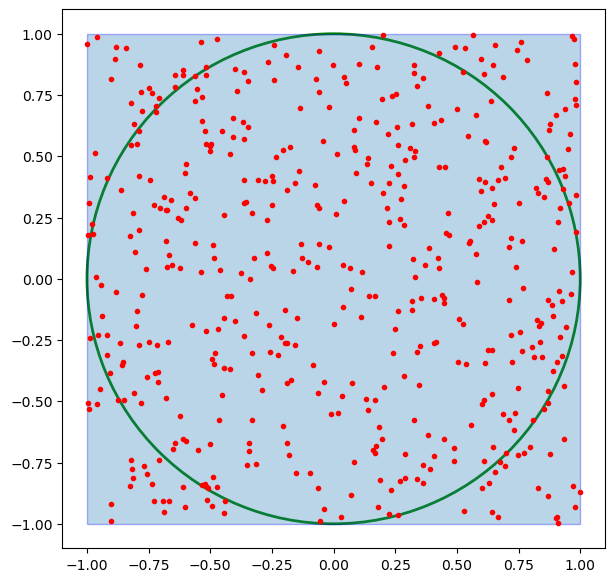

In [11]:
fig=plt.figure(figsize=(7,7))
ax= fig.add_subplot(1,1,1)
circ=plt.Circle((0,0),radius=1,edgecolor='g',lw=2.0,facecolor='None')
box= plt.Rectangle((-1,-1),2,2,edgecolor='b',alpha=0.3)
ax.add_patch(circ)
ax.add_patch(box)
plt.plot(rn[:,0],rn[:,1],'r.')
plt.ylim(-1.1,1.1)
plt.xlim(-1.1,1.1)

In [12]:
import math
S0=36.
T=1.0
r=0.06
sigma=0.2
def simulate_tree(M):
    dt=T/M
    u=math.exp(sigma*math.sqrt(dt))
    d=1/u
    S=np.zeros((M+1,M+1))
    S[0,0]=S0
    z=1
    for t in range(1,M+1):
        for i in range(z):
            S[i,t]=S[i,t-1]*u
            S[i+1,t]=S[i,t-1]*d
        z+=1
    return S


In [13]:
np.set_printoptions(formatter={'float':lambda x: '%6.2f'% x})

In [14]:
simulate_tree(4)

array([[ 36.00,  39.79,  43.97,  48.59,  53.71],
       [  0.00,  32.57,  36.00,  39.79,  43.97],
       [  0.00,   0.00,  29.47,  32.57,  36.00],
       [  0.00,   0.00,   0.00,  26.67,  29.47],
       [  0.00,   0.00,   0.00,   0.00,  24.13]])

In [15]:
%time simulate_tree(500)

CPU times: user 48.2 ms, sys: 1.57 ms, total: 49.8 ms
Wall time: 54.9 ms


array([[ 36.00,  36.32,  36.65, ..., 3095.69, 3123.50, 3151.57],
       [  0.00,  35.68,  36.00, ..., 3040.81, 3068.13, 3095.69],
       [  0.00,   0.00,  35.36, ..., 2986.89, 3013.73, 3040.81],
       ...,
       [  0.00,   0.00,   0.00, ...,   0.42,   0.42,   0.43],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.41,   0.42],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.00,   0.41]])

In [16]:
M=4

In [17]:
up=np.arange(M+1)
up=np.resize(up,(M+1,M+1))
up

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [18]:
down=up.T*2
down

array([[0, 0, 0, 0, 0],
       [2, 2, 2, 2, 2],
       [4, 4, 4, 4, 4],
       [6, 6, 6, 6, 6],
       [8, 8, 8, 8, 8]])

In [19]:
up-down

array([[ 0,  1,  2,  3,  4],
       [-2, -1,  0,  1,  2],
       [-4, -3, -2, -1,  0],
       [-6, -5, -4, -3, -2],
       [-8, -7, -6, -5, -4]])

In [20]:
dt=T/M

In [21]:
S0*np.exp(sigma* math.sqrt(dt)*(up-down))

array([[ 36.00,  39.79,  43.97,  48.59,  53.71],
       [ 29.47,  32.57,  36.00,  39.79,  43.97],
       [ 24.13,  26.67,  29.47,  32.57,  36.00],
       [ 19.76,  21.84,  24.13,  26.67,  29.47],
       [ 16.18,  17.88,  19.76,  21.84,  24.13]])

In [22]:
def simulate_tree_np(M):
    dt=T/M
    up=np.arange(M+1)
    up=np.resize(up,(M+1,M+1))
    down=up.transpose()*2
    S=S0*np.exp(sigma*math.sqrt(dt)*(up-down))
    return S


In [23]:
%time simulate_tree_np(500)

CPU times: user 3.31 ms, sys: 2.89 ms, total: 6.19 ms
Wall time: 6.96 ms


array([[ 36.00,  36.32,  36.65, ..., 3095.69, 3123.50, 3151.57],
       [ 35.36,  35.68,  36.00, ..., 3040.81, 3068.13, 3095.69],
       [ 34.73,  35.05,  35.36, ..., 2986.89, 3013.73, 3040.81],
       ...,
       [  0.00,   0.00,   0.00, ...,   0.42,   0.42,   0.43],
       [  0.00,   0.00,   0.00, ...,   0.41,   0.41,   0.42],
       [  0.00,   0.00,   0.00, ...,   0.40,   0.41,   0.41]])

In [26]:
M=100
I=50000
def mcs_simulation_py(p):
              M, I = p
              dt = T / M
              S = np.zeros((M + 1, I))
              S[0] = S0
              rn = np.random.standard_normal(S.shape)  
              for t in range(1, M + 1):  
                  for i in range(I):  
                      S[t, i] = S[t-1, i] * math.exp((r - sigma ** 2 / 2) * dt +
                                            sigma * math.sqrt(dt) * rn[t, i])  
              return S

In [27]:
%time S= mcs_simulation_py((M,I))

CPU times: user 2.1 s, sys: 23.1 ms, total: 2.12 s
Wall time: 2.12 s


In [28]:
S[-1].mean()

38.257202625862405

In [29]:
S0 * math.exp(r * T)

38.22611567563295

In [30]:
K=40.

In [31]:
C0=math.exp(-r * T)* np.maximum(K - S[-1],0).mean()

In [32]:
C0

3.8220483685515068

In [33]:
r

0.06

In [34]:
def mcs_simulation_np(p):
              M, I = p
              dt = T / M
              S = np.zeros((M + 1, I))
              S[0] = S0
              rn = np.random.standard_normal(S.shape)
              for t in range(1, M + 1):  
                  S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt +
                                         sigma * math.sqrt(dt) * rn[t]) 
              return S

In [35]:
%time S = mcs_simulation_np((M, I))

CPU times: user 109 ms, sys: 7.34 ms, total: 117 ms
Wall time: 122 ms


In [36]:
S[-1].mean()

38.2487328619023

In [37]:
%timeit S = mcs_simulation_np((M, I))

103 ms ± 183 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [38]:
S

array([[ 36.00,  36.00,  36.00, ...,  36.00,  36.00,  36.00],
       [ 36.80,  37.20,  36.11, ...,  36.95,  37.03,  36.15],
       [ 36.80,  38.74,  36.53, ...,  35.12,  37.06,  35.30],
       ...,
       [ 33.73,  44.49,  41.37, ...,  36.76,  39.55,  36.47],
       [ 33.98,  44.29,  41.64, ...,  36.85,  39.91,  37.58],
       [ 35.54,  44.78,  42.61, ...,  37.77,  41.23,  38.09]])

[*********************100%***********************]  1 of 1 completed


In [1]:
data=pd.read_csv('./ICICIBANK.csv',index_col=0,parse_dates=True).dropna()

NameError: name 'pd' is not defined

In [45]:
sym='ICICIBANK'


In [46]:
alpha=0.25

In [49]:
data['EWMA']=data['Adj Close']
data['ICICIBANK']=data['Adj Close']

In [55]:
%%time
for t in zip(data.index, data.index[1:]):
    data.loc[t[1], 'EWMA'] = (alpha * data.loc[t[1], sym] + (1 - alpha) * data.loc[t[0], 'EWMA'])

CPU times: user 142 ms, sys: 1.7 ms, total: 144 ms
Wall time: 143 ms


In [57]:
icic_data=data[['ICICIBANK','EWMA']]

In [59]:
icic_data.head()

,ICICIBANK,EWMA
Date,,
2013-08-05,147.537888,147.537888
2013-08-06,141.636047,146.062428
2013-08-07,141.946625,145.033477
2013-08-08,143.058334,144.539691
2013-08-12,141.750443,143.842379


<Axes: xlabel='Date'>

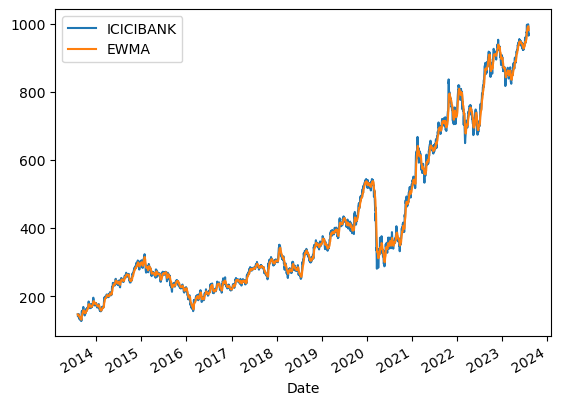

In [61]:
icic_data.plot()

In [62]:
def ewma_py(x, alpha):
              y = np.zeros_like(x)
              y[0] = x[0]
              for i in range(1, len(x)):
                  y[i] = alpha * x[i] + (1-alpha) * y[i-1]
              return y

In [66]:
%time data['EWMA_PY'] = ewma_py(data[sym], alpha)

CPU times: user 3.66 ms, sys: 13 µs, total: 3.68 ms
Wall time: 3.67 ms


In [67]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,EWMA,ICICIBANK,EWMA_PY
Date,,,,,,,,,
2013-08-05,161.990906,165.363632,157.790909,164.081818,147.537888,13765306,147.537888,147.537888,147.537888
2013-08-06,162.909088,162.909088,156.836365,157.518188,141.636047,24008127,146.062428,141.636047,146.062428
2013-08-07,157.818176,159.945450,156.454544,157.863632,141.946625,24653909,145.033477,141.946625,145.033477
2013-08-08,158.181824,160.772720,156.772720,159.100006,143.058334,23881990,144.539691,143.058334,144.539691
2013-08-12,160.818176,162.063629,156.654541,157.645447,141.750443,31439567,143.842379,141.750443,143.842379


In [68]:
 %time data['EWMA_PY'] = ewma_py(data[sym].values, alpha) 

CPU times: user 762 µs, sys: 9 µs, total: 771 µs
Wall time: 771 µs


In [69]:
def f(x):
    return np.sin(x)+0.5 * x

In [70]:
def create_plot(x, y, styles, labels, axlabels):
            plt.figure(figsize=(10, 6))
            for i in range(len(x)):
                plt.plot(x[i], y[i], styles[i], label=labels[i])
                plt.xlabel(axlabels[0])
                plt.ylabel(axlabels[1])
            plt.legend(loc=0)

In [71]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 50)

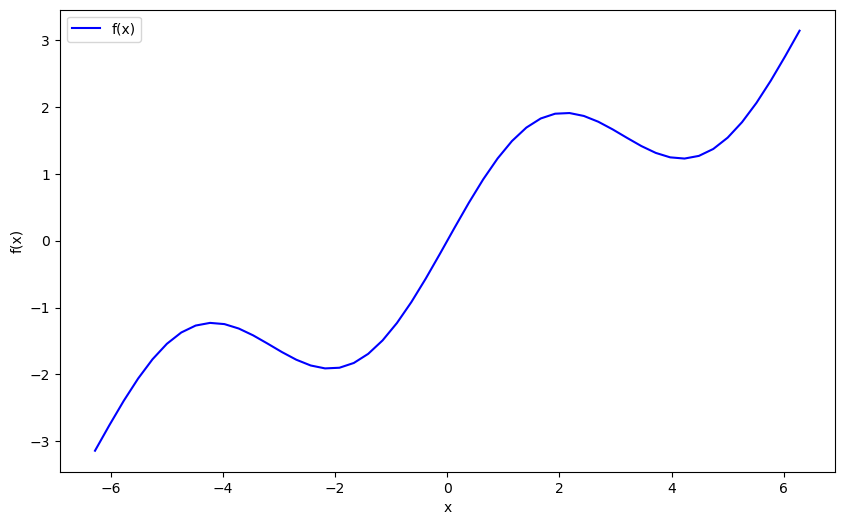

In [72]:
create_plot([x], [f(x)], ['b'], ['f(x)'], ['x', 'f(x)'])

In [73]:
x

array([ -6.28,  -6.03,  -5.77,  -5.51,  -5.26,  -5.00,  -4.74,  -4.49,
        -4.23,  -3.98,  -3.72,  -3.46,  -3.21,  -2.95,  -2.69,  -2.44,
        -2.18,  -1.92,  -1.67,  -1.41,  -1.15,  -0.90,  -0.64,  -0.38,
        -0.13,   0.13,   0.38,   0.64,   0.90,   1.15,   1.41,   1.67,
         1.92,   2.18,   2.44,   2.69,   2.95,   3.21,   3.46,   3.72,
         3.98,   4.23,   4.49,   4.74,   5.00,   5.26,   5.51,   5.77,
         6.03,   6.28])

In [74]:
res = np.polyfit(x, f(x), deg=1, full=True)

In [75]:
ry = np.polyval(res[0], x)

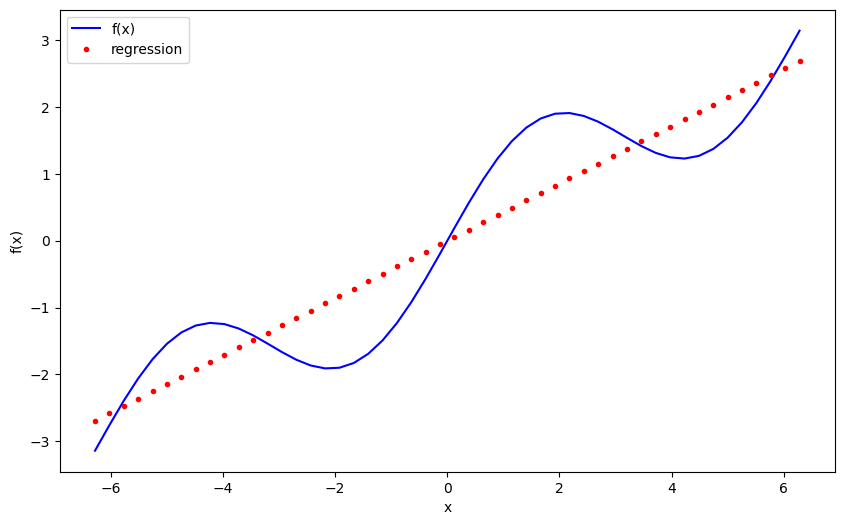

In [76]:
create_plot([x, x], [f(x), ry], ['b', 'r.'],
                     ['f(x)', 'regression'], ['x', 'f(x)'])

In [78]:
import numpy.random as npr 

In [79]:
npr.seed(100)
np.set_printoptions(precision=4)

In [80]:
npr.rand(10)

array([0.5434, 0.2784, 0.4245, 0.8448, 0.0047, 0.1216, 0.6707, 0.8259,
       0.1367, 0.5751])

In [81]:
npr.rand(5,5)

array([[0.8913, 0.2092, 0.1853, 0.1084, 0.2197],
       [0.9786, 0.8117, 0.1719, 0.8162, 0.2741],
       [0.4317, 0.94  , 0.8176, 0.3361, 0.1754],
       [0.3728, 0.0057, 0.2524, 0.7957, 0.0153],
       [0.5988, 0.6038, 0.1051, 0.3819, 0.0365]])

In [83]:
a=5.
b=10.

In [84]:
npr.rand(10)* (b - a)+a

array([9.4521, 9.9046, 5.2997, 9.4527, 7.8845, 8.7124, 8.1509, 7.9092,
       5.1022, 6.0501])

In [91]:
S0 = 100  
r = 0.06 
sigma = 0.25  
T = 2.0  
I = 10000  
ST1 = S0 * np.exp((r - 0.5 * sigma ** 2) * T +
        sigma * math.sqrt(T) * npr.standard_normal(I))

Text(0, 0.5, 'frequency')

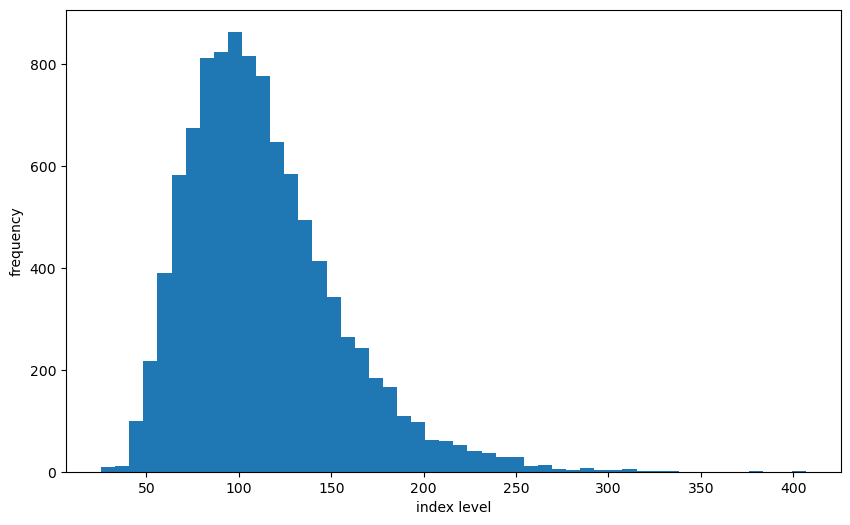

In [92]:
plt.figure(figsize=(10, 6))
plt.hist(ST1, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from statsmodels.tsa.stattools import coint

sym='ITC'
#tickers = ["INFY.NS", "TCS.NS", "HDFCBANK.NS", "ICICIBANK.NS"]
# data = yf.download(tickers, period="5y", interval="1d", group_by="ticker")
# data.to_csv("5_years.csv")
# Clean and preprocess data
# data = data["Close"].dropna()
# data = data.apply(lambda x: np.log(x))
tickers=[f'{sym}.NS']
icicibnk_df=yf.download(tickers=tickers,period='10y',interval='1d')
icicibnk_df.to_csv(f'{sym}.csv')


In [135]:
import pandas as pd
import numpy as np
# sym='TCS'
df=pd.read_csv(f'./{sym}.csv',index_col=0,parse_dates=True).dropna()
df[sym]=df['Adj Close']
df=df[[sym]]
df.head()


,ITC
Date,
2013-08-05,171.534241
2013-08-06,168.900375
2013-08-07,164.732208
2013-08-08,166.394363
2013-08-12,171.662094


In [78]:
df=df[df.index> '2018-01-01']

In [ ]:
sma1=42
sma2=252
df['sma1']=df[sym].rolling(sma1).mean()
df['sma2']=df[sym].rolling(sma2).mean()
df[[sym,'sma1','sma2']].plot()
df.dropna(inplace=True)


In [ ]:
df['position']=np.where(df['sma1']>df['sma2'],1,-1)
df.tail()

In [ ]:
ax=df.plot(secondary_y='position',figsize=(10,6))
ax.get_legend().set_bbox_to_anchor((0.25,0.85))

In [ ]:
df['returns']=np.log(df[sym]/df[sym].shift(1))
df['strategy']=df['position'].shift(1)*df['returns']
df.round(4).head()

In [129]:
df.dropna(inplace=True)

In [ ]:
np.exp(df[['returns','strategy']].sum())

In [ ]:
df[['returns','strategy']].std() * 252 ** 0.5

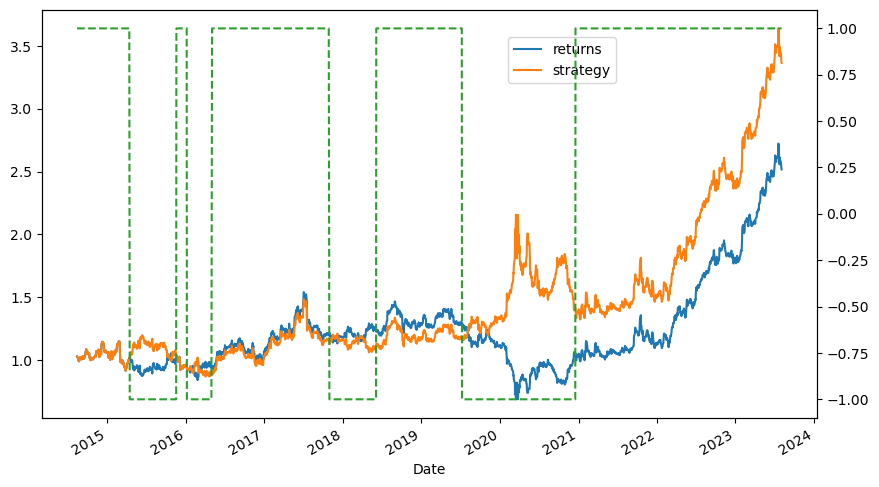

In [133]:
ax=df[['returns','strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))
df['position'].plot(ax=ax,secondary_y='position', style='--')
ax.get_legend().set_bbox_to_anchor((0.25,0.85,0.5,0.1));

In [27]:

import pandas as pd
import numpy as np
from itertools import product
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sma1=range(10,61,4)
sma2=range(180,281,10)

# Initialize an empty DataFrame to store results
results =[]
sym='TCS'
df=pd.read_csv(f'./{sym}.csv',index_col=0,parse_dates=True).dropna()
df[sym]=df['Adj Close']
df=df[[sym]]
df.head()


# Assuming 'df' and 'sym' are defined elsewhere
# Make sure to replace them with your actual DataFrame and symbol

for SMA1, SMA2 in product(sma1, sma2):
    data = pd.DataFrame(df[sym])
    data.dropna(inplace=True)
    
    data['returns'] = np.log(data[sym] / data[sym].shift(1))
    data['sma1'] = data[sym].rolling(SMA1).mean()
    data['sma2'] = data[sym].rolling(SMA2).mean()
    data.dropna(inplace=True)
    
    data['position'] = np.where(data['sma1'] > data['sma2'], 1, -1)
    data['strategy'] = data['position'].shift(1) * data['returns']
    data.dropna(inplace=True)
    
    perf = np.exp(data[['returns', 'strategy']].sum())
    
    result_row = {
        'sma1': SMA1,
        'sma2': SMA2,
        'market': perf['returns'],
        'strategy': perf['strategy'],
        'out': perf['strategy'] - perf['returns']
    }
    results.append(result_row)
results_df=pd.DataFrame(results)

In [2]:
results_df.sort_values('out',ascending=False).head(7)

,sma1,sma2,market,strategy,out
9,10,270,3.133983,1.655379,-1.478604
18,14,250,3.326861,1.825698,-1.501164
20,14,270,3.133983,1.604596,-1.529387
17,14,240,3.227054,1.669075,-1.557979
42,22,270,3.133983,1.547800,-1.586183
128,54,250,3.326861,1.711386,-1.615476
21,14,280,3.067589,1.396685,-1.670905


In [8]:
tcs_data=pd.DataFrame(data[sym])
lags=5
cols=[]

for lag in range(1,lags+1):
    col=f'lag_{lag}'
    tcs_data[col]=tcs_data[sym].shift(lag)
    cols.append(col)
print(tcs_data.head(7))

                    TCS        lag_1        lag_2        lag_3        lag_4  \
Date                                                                          
2014-09-24  1103.684326          NaN          NaN          NaN          NaN   
2014-09-25  1131.077759  1103.684326          NaN          NaN          NaN   
2014-09-26  1120.805420  1131.077759  1103.684326          NaN          NaN   
2014-09-29  1155.861328  1120.805420  1131.077759  1103.684326          NaN   
2014-09-30  1142.770020  1155.861328  1120.805420  1131.077759  1103.684326   
2014-10-01  1159.056030  1142.770020  1155.861328  1120.805420  1131.077759   
2014-10-07  1140.577759  1159.056030  1142.770020  1155.861328  1120.805420   

                  lag_5  
Date                     
2014-09-24          NaN  
2014-09-25          NaN  
2014-09-26          NaN  
2014-09-29          NaN  
2014-09-30          NaN  
2014-10-01  1103.684326  
2014-10-07  1131.077759  


In [9]:
tcs_data.dropna(inplace=True)


In [10]:
tcs_data.head()

,TCS,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,
2014-10-01,1159.056030,1142.770020,1155.861328,1120.805420,1131.077759,1103.684326
2014-10-07,1140.577759,1159.056030,1142.770020,1155.861328,1120.805420,1131.077759
2014-10-08,1120.470947,1140.577759,1159.056030,1142.770020,1155.861328,1120.805420
2014-10-09,1130.013184,1120.470947,1140.577759,1159.056030,1142.770020,1155.861328
2014-10-10,1118.508545,1130.013184,1120.470947,1140.577759,1159.056030,1142.770020


In [14]:
tcs_data=pd.DataFrame(data[sym])
tcs_data['returns']=np.log(tcs_data/tcs_data.shift(1))

In [15]:
tcs_data.dropna(inplace=True)

In [16]:
tcs_data['direction']=np.sign(tcs_data['returns']).astype(int)

In [17]:
tcs_data.head()

,TCS,returns,direction
Date,,,
2014-09-25,1131.077759,0.024517,1
2014-09-26,1120.805420,-0.009123,-1
2014-09-29,1155.861328,0.030798,1
2014-09-30,1142.770020,-0.011391,-1
2014-10-01,1159.056030,0.014151,1


<Axes: >

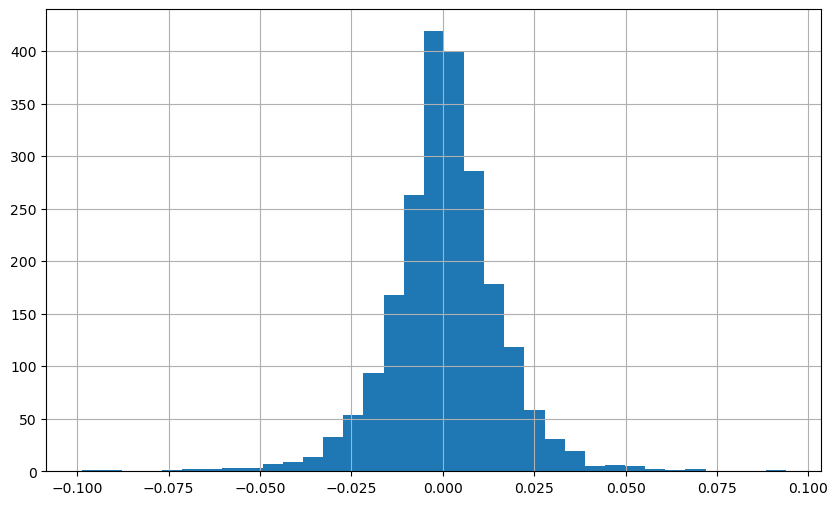

In [18]:
tcs_data['returns'].hist(bins=35,figsize=(10,6))

In [19]:
lags=2
def create_lags(data):
    global cols
    cols=[]
    for lag in range(1,lags+1):
        col=f'lag_{lag}'
        data[col]=data['returns'].shift(lag)
        cols.append(col)
create_lags(tcs_data)
tcs_data.head()


,TCS,returns,direction,lag_1,lag_2
Date,,,,,
2014-09-25,1131.077759,0.024517,1,NaN,NaN
2014-09-26,1120.805420,-0.009123,-1,0.024517,NaN
2014-09-29,1155.861328,0.030798,1,-0.009123,0.024517
2014-09-30,1142.770020,-0.011391,-1,0.030798,-0.009123
2014-10-01,1159.056030,0.014151,1,-0.011391,0.030798


In [21]:
tcs_data.dropna(inplace=True)

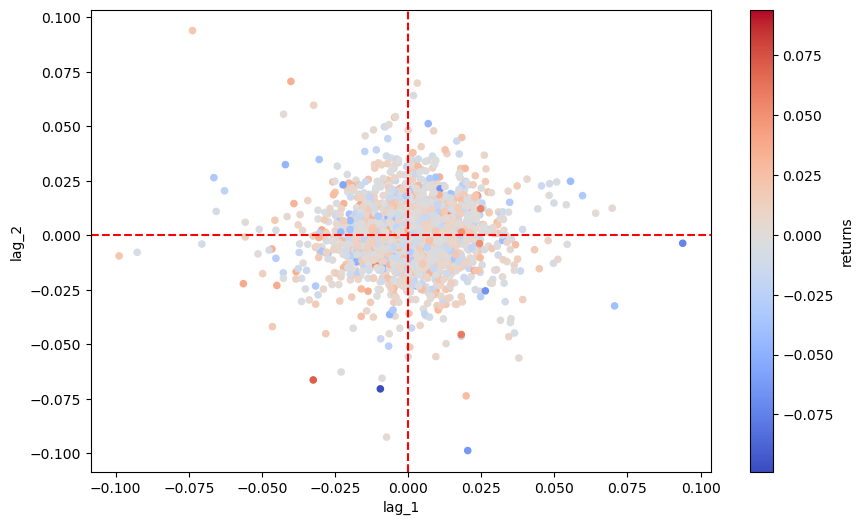

In [28]:
tcs_data.plot.scatter(x='lag_1',y='lag_2',c='returns',cmap='coolwarm',figsize=(10,6),colorbar=True)
plt.axvline(0,c='r',ls='--')
plt.axhline(0,c='r',ls='--')

In [29]:
from sklearn.linear_model import LinearRegression


In [30]:
model=LinearRegression()

In [32]:
tcs_data['pos_ols_1']=model.fit(tcs_data[cols],tcs_data['returns']).predict(tcs_data[cols])

In [33]:
tcs_data['pos_ols_2']=model.fit(tcs_data[cols],tcs_data['direction']).predict(tcs_data[cols])

In [34]:
tcs_data[['pos_ols_1','pos_ols_2']].head()

,pos_ols_1,pos_ols_2
Date,,
2014-09-29,0.000201,-0.043582
2014-09-30,0.000416,0.079312
2014-10-01,0.000117,-0.064736
2014-10-07,0.000594,0.080909
2014-10-08,0.000431,-0.012368


In [35]:
tcs_data[['pos_ols_1','pos_ols_2']]=np.where(tcs_data[['pos_ols_1','pos_ols_2']]>0,1,-1)

In [36]:
tcs_data['pos_ols_1'].value_counts()

 1    2103
-1      80
Name: pos_ols_1, dtype: int64

In [37]:
tcs_data['pos_ols_2'].value_counts()

 1    1790
-1     393
Name: pos_ols_2, dtype: int64

In [38]:
(tcs_data['pos_ols_1'].diff() != 0).sum()

123

In [39]:
(tcs_data['pos_ols_2'].diff() != 0).sum()

654

In [40]:
tcs_data['strats_ols_1']=tcs_data['pos_ols_1']*tcs_data['returns']

In [41]:
tcs_data['strats_ols_2']=tcs_data['pos_ols_2']*tcs_data['returns']

In [43]:
tcs_data[['returns','strats_ols_1','strats_ols_2']].sum().apply(np.exp)

returns         3.072389
strats_ols_1    3.268758
strats_ols_2    3.465303
dtype: float64

In [44]:
(tcs_data['direction']==tcs_data['pos_ols_1']).value_counts()

True     1127
False    1056
dtype: int64

In [45]:
(tcs_data['direction']==tcs_data['pos_ols_2']).value_counts()

True     1141
False    1042
dtype: int64

<Axes: xlabel='Date'>

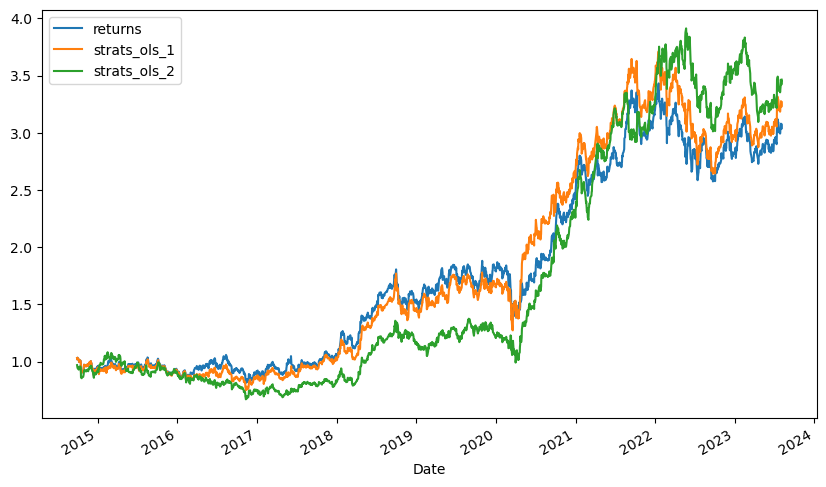

In [46]:
tcs_data[['returns','strats_ols_1','strats_ols_2']].cumsum().apply(np.exp).plot(figsize=(10,6))

In [9]:
import numpy as np
import math

import matplotlib.pyplot as plt

Text(0, 0.5, 'frequency')

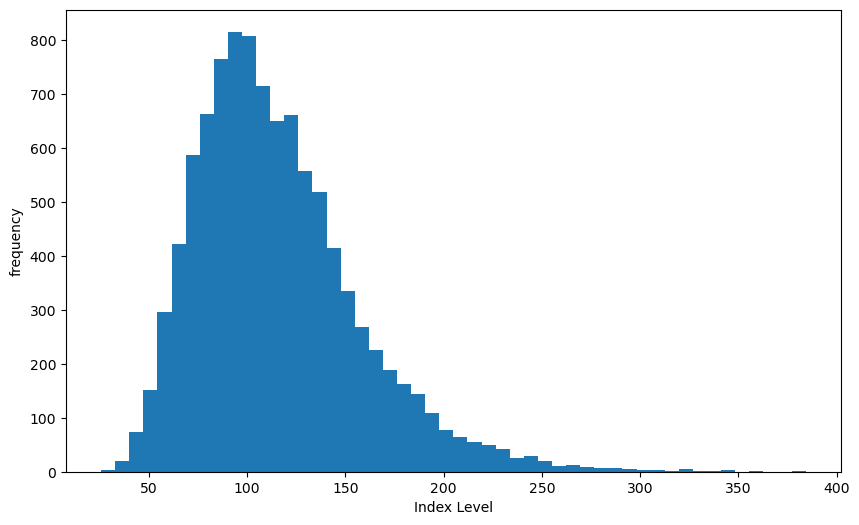

In [10]:
S0=100
r=0.072
sigma=0.25
T=2.0
I=10000
S=S0*np.exp((r- 0.5 * sigma ** 2) * T + sigma * math.sqrt(T) * np.random.standard_normal(I) )
plt.figure(figsize=(10,6))
plt.hist(S,bins=50)
plt.xlabel('Index Level')
plt.ylabel('frequency')

In [11]:
ST2=S0 * np.random.lognormal(( r - 0.5 * sigma ** 2 ) * T, sigma * math.sqrt(T),size=I )

(array([ 24.,  85., 225., 403., 574., 761., 861., 909., 874., 797., 755.,
        667., 582., 499., 404., 314., 289., 199., 160., 148.,  96.,  84.,
         69.,  41.,  46.,  37.,  27.,  12.,  13.,  12.,   9.,   3.,   2.,
          7.,   1.,   5.,   2.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   1.]),
 array([ 32.10109218,  40.28920173,  48.47731129,  56.66542084,
         64.85353039,  73.04163994,  81.2297495 ,  89.41785905,
         97.6059686 , 105.79407816, 113.98218771, 122.17029726,
        130.35840681, 138.54651637, 146.73462592, 154.92273547,
        163.11084503, 171.29895458, 179.48706413, 187.67517368,
        195.86328324, 204.05139279, 212.23950234, 220.4276119 ,
        228.61572145, 236.803831  , 244.99194055, 253.18005011,
        261.36815966, 269.55626921, 277.74437877, 285.93248832,
        294.12059787, 302.30870742, 310.49681698, 318.68492653,
        326.87303608, 335.06114563, 343.24925519, 351.43736474,
        359.625474

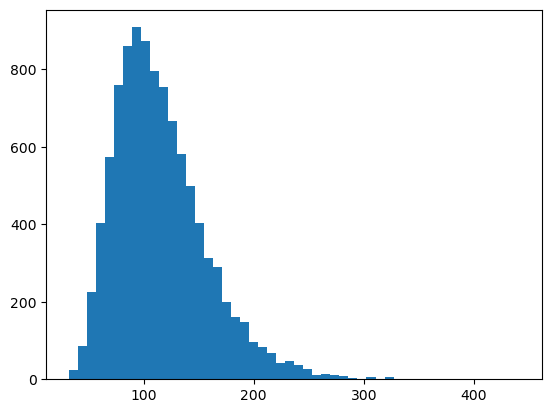

In [12]:
plt.hist(ST2,bins=50)

In [13]:
import scipy.stats as scs

In [14]:
def print_statistics(a1, a2):
             ''' Prints selected statistics.
             Parameters
             ==========
             a1, a2: ndarray objects
                 results objects from simulation
             '''
             sta1 = scs.describe(a1)  
             sta2 = scs.describe(a2)  
             print('%14s %14s %14s' %
                 ('statistic', 'data set 1', 'data set 2'))
             print(45 * "-")
             print('%14s %14.3f %14.3f' % ('size', sta1[0], sta2[0]))
             print('%14s %14.3f %14.3f' % ('min', sta1[1][0], sta2[1][0]))
             print('%14s %14.3f %14.3f' % ('max', sta1[1][1], sta2[1][1]))
             print('%14s %14.3f %14.3f' % ('mean', sta1[2], sta2[2]))
             print('%14s %14.3f %14.3f' % ('std', np.sqrt(sta1[3]),
                                           np.sqrt(sta2[3])))
             print('%14s %14.3f %14.3f' % ('skew', sta1[4], sta2[4]))
             print('%14s %14.3f %14.3f' % ('kurtosis', sta1[5], sta2[5]))


In [16]:
print_statistics(S,ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         25.708         32.101
           max        384.290        441.507
          mean        115.479        115.608
           std         42.037         42.053
          skew          1.136          1.089
      kurtosis          2.226          2.094


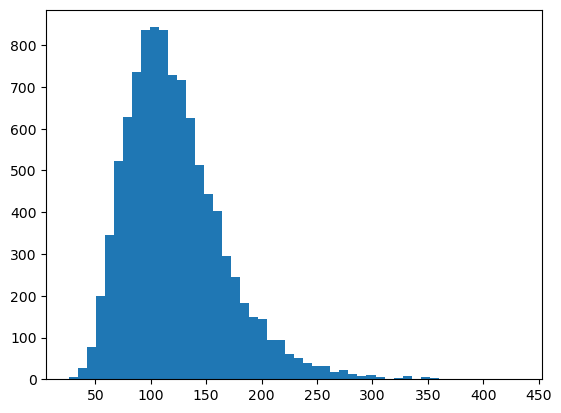

In [27]:
I=10000
M=50
dt=T/M
S=np.zeros((M+1,I))
S[0]=S0
for t in range(1,M+1):
    S[t]=S[t-1]*np.exp(( r - r * 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt) * np.random.standard_normal(I))
plt.hist(S[-1],bins=50);

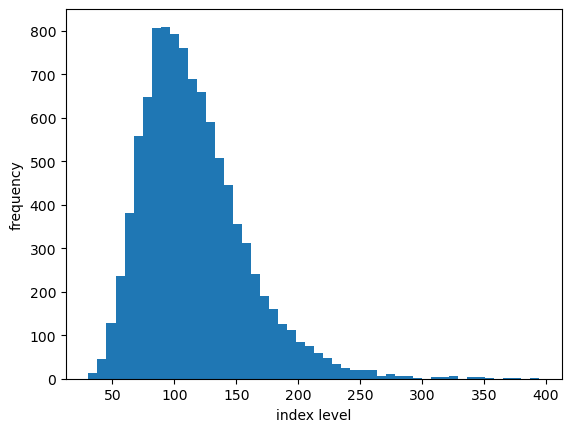

In [29]:
I = 10000  
M = 50  
dt = T / M  
S = np.zeros((M + 1, I))  
S[0] = S0  
for t in range(1, M + 1):
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt +
            sigma * math.sqrt(dt) * np.random.standard_normal(I))
plt.hist(S[-1],bins=50)
plt.xlabel('index level')
plt.ylabel('frequency');

In [30]:
print_statistics(S[-1],ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         30.653         32.101
           max        394.677        441.507
          mean        115.934        115.608
           std         41.907         42.053
          skew          1.173          1.089
      kurtosis          2.563          2.094


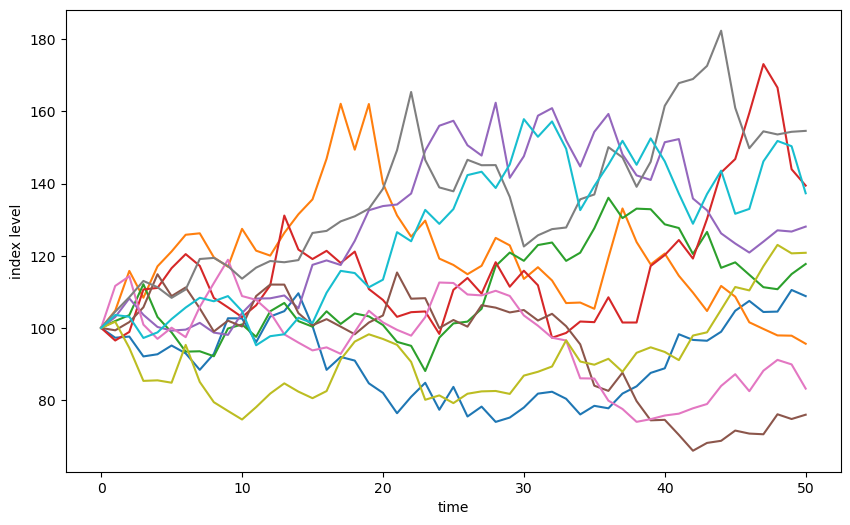

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level');


In [1]:
import pandas as pd
import numpy as np

In [6]:
# Load historical stock price data
# Replace 'your_file.csv' with the actual file path or data source

data=pd.read_csv('./TCS.csv',index_col=0)
# Calculate daily log returns
data['Log_Returns']=np.log(data['Adj Close']/data['Adj Close'].shift(1))

# Calculate mean and standard deviation of log returns
mean_return=data['Log_Returns'].mean()
std_dev_return=data['Log_Returns'].std()

# Annualize volatility
annualized_volatility=std_dev_return * np.sqrt(252)

print("Mean Daily Log Return:", mean_return)
print("Standard Deviation of Daily Log Returns:", std_dev_return)
print("Annualized Volatility:", annualized_volatility)

Mean Daily Log Return: 0.0006142466232060405
Standard Deviation of Daily Log Returns: 0.015400118221335869
Annualized Volatility: 0.2444692978478944


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
initial_price = 3458  # Current TCS stock price
strike_price = 3500   # Strike price of the option
expiry = 16           # Time to expiration in days
volatility = annualized_volatility     # Volatility of TCS stock
risk_free_rate = 0.075 # Risk-free rate
lot_size=175

# Number of simulations
num_simulations = 100000

# Generate random price movements
np.random.seed(42)
dt = expiry / 365
# daily_returns = np.exp(
#     (risk_free_rate - 0.5 * volatility ** 2) * dt + volatility * np.sqrt(dt) * np.random.randn(num_simulations))
# price_paths = initial_price * daily_returns.cumprod()
daily_returns=np.exp((risk_free_rate- 0.5 * volatility ** 2) * dt+ volatility * np.sqrt(dt) * np.random.randn(num_simulations,expiry) )
price_paths = initial_price * daily_returns.cumprod(axis=1)
# Calculate option payoffs
option_payoffs = np.maximum(price_paths[:, -1] - strike_price, 0)

# Calculate option present values
discount_factors = np.exp(-risk_free_rate * dt * expiry)
option_values = option_payoffs * discount_factors

# Calculate option value
option_value = np.mean(option_values)

print(f"Estimated option value: {option_value:.2f}")
print(f"{price_paths[:,-1]}")

# Plot price paths
# plt.figure(figsize=(10, 6))
# plt.plot(np.arange(1, expiry+1), price_paths[:10, :].T)
# plt.xlabel('Days')
# plt.ylabel('Stock Price')
# plt.title('Simulated TCS Stock Price Paths')
# plt.show()


Estimated option value: 348.73
[3495.57974813 2910.35048061 2698.90177155 ... 3121.62951729 3930.63262579
 3638.75415453]


Estimated option value: 1371.47


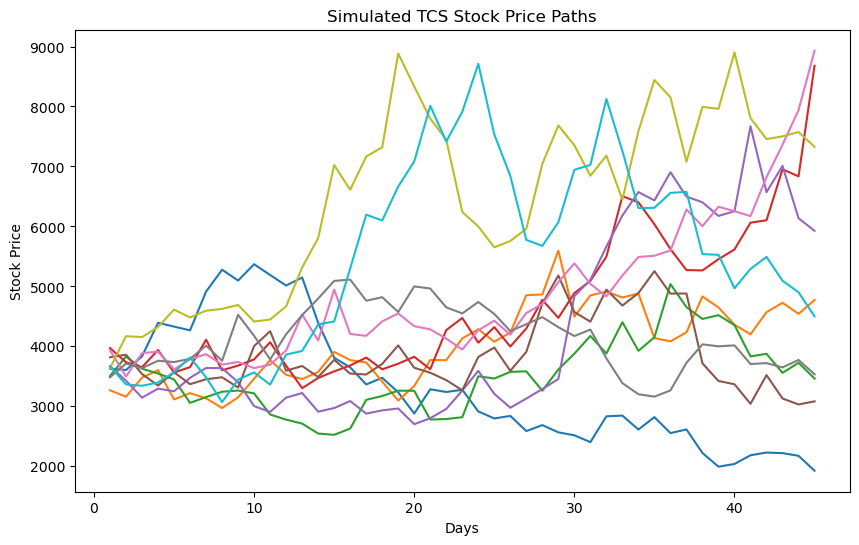

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
initial_price = 3458  # Current TCS stock price
strike_price = 3500   # Strike price of the option
expiry = 45          # Time to expiration in days
volatility = annualized_volatility      # Volatility of TCS stock (you need to provide the actual volatility value)
risk_free_rate = 0.075 # Risk-free rate
lot_size = 175        # Lot size for TCS stock options

# Number of simulations
num_simulations = 100000

# Generate random price movements
np.random.seed(42)
dt = expiry / 365

# Generate daily price returns using Brownian motion
daily_returns = np.exp(
    (risk_free_rate - 0.5 * volatility ** 2) * dt +
    volatility * np.sqrt(dt) * np.random.randn(num_simulations, expiry)
)

# Calculate price paths by cumulatively multiplying daily returns
price_paths = initial_price * daily_returns.cumprod(axis=1)

# Calculate option payoffs
option_payoffs = np.maximum(price_paths[:, -1] - strike_price, 0) 

# Calculate option present values
discount_factors = np.exp(-risk_free_rate * dt * expiry)
option_values = option_payoffs * discount_factors

# Calculate option value
option_value = np.mean(option_values)

print(f"Estimated option value: {option_value:.2f}")

# Plot price paths
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, expiry+1), price_paths[:10, :].T)
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('Simulated TCS Stock Price Paths')
plt.show()


Estimated Call Option Value: 111.35326090861109


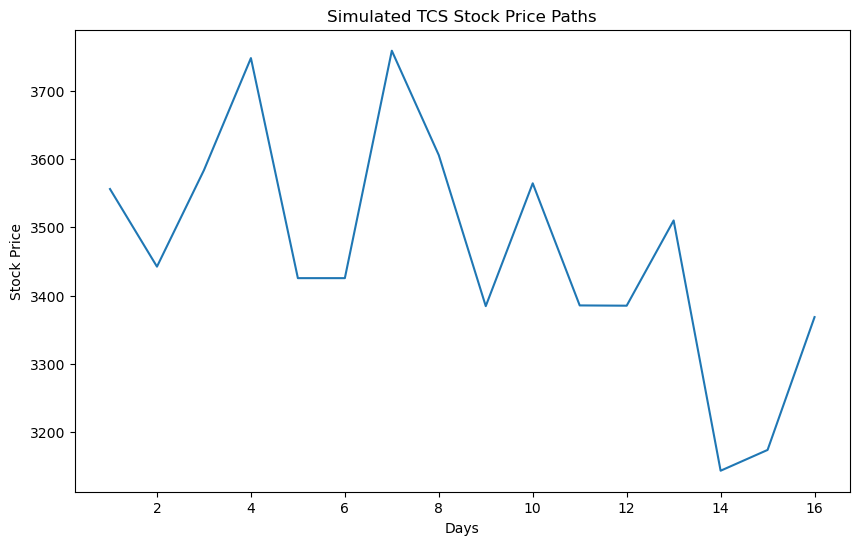

In [35]:
import numpy as np

# Parameters
volatility = 0.2444
risk_free_rate = 0.075
current_stock_price = 3460
strike_price = 3400
time_to_expiry_days = 16
num_simulations = 100000

# Time to expiry in years
time_to_expiry_years = time_to_expiry_days / 365

# Generate random samples for stock price movement
np.random.seed(42)  # for reproducibility
z = np.random.normal(size=num_simulations)
stock_prices = current_stock_price * np.exp(
    (risk_free_rate - 0.5 * volatility**2) * time_to_expiry_years +
    volatility * np.sqrt(time_to_expiry_years) * z
)

# Calculate option payoffs
call_option_payoffs = np.maximum(stock_prices - strike_price, 0)

# Discounted average of payoffs
option_value = np.mean(call_option_payoffs) * np.exp(-risk_free_rate * time_to_expiry_years)

print("Estimated Call Option Value:", option_value)

# print(stock_prices[:10,:])
# Plot price paths
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, time_to_expiry_days+1), stock_prices[:16])
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('Simulated TCS Stock Price Paths')
plt.show()


In [ ]:
!pip install nsepythonserver

In [10]:
from datetime import datetime
from nsepythonserver import *

In [57]:
symbol = "SBIN"
start_date = "17-08-2023"
end_date ="18-08-2023"
instrumentType = "options"
expiry_date ="31-Aug-2023"
strikePrice = 580
optionType="CE"
# print(derivative_history(symbol,start_date,end_date,instrumentType,expiry_date,strikePrice,optionType))



def get_atm_strike(symbol):
    payload=nse_optionchain_scrapper(symbol)
    





In [58]:
strike=get_atm_strike(symbol=symbol)
print('strike',strike)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

117
strike None


100 16624  100 16624    0     0  69436      0 --:--:-- --:--:-- --:--:-- 70143
